# MotionPlanning.jl - Basic Usage Examples

Near neighbor sets are cached by default in the following examples; I still need to do some work on exposing the internals/designing a decent user interface for replanning.

In [1]:
using MotionPlanning
include(Pkg.dir("MotionPlanning")*"/test/obstaclesets/2D.jl")
include(Pkg.dir("MotionPlanning")*"/test/obstaclesets/ND.jl")

### Geometric Planning

In [2]:
statespace = UnitHypercube(2)   # BoundedStateSpace, lo = zeros(2), hi = ones(2), dist = Euclidean()
init = [.1, .1]
goal = PointGoal([.9, .9])
collisionchecker = PointRobot2D(ISRR_POLY_WITH_SPIKE())
P = MPProblem(statespace, init, goal, collisionchecker);

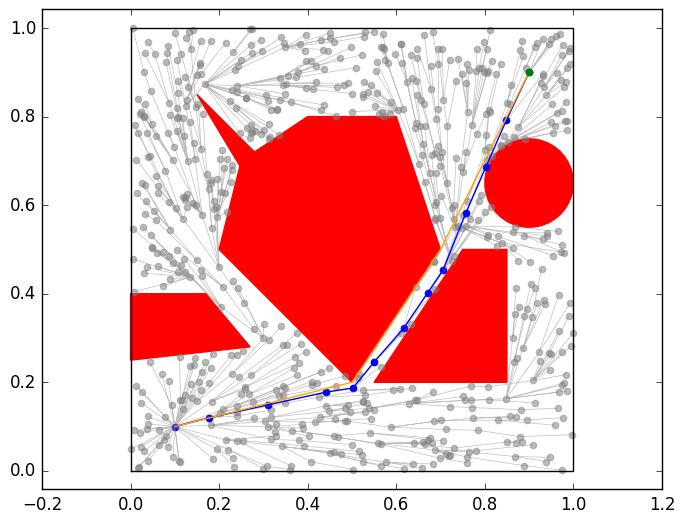

(:solved,1.234603722643713)

In [3]:
fmtstar!(P, 1000, connections = :R, rm = 1.5)
adaptive_shortcut!(P)
plot(P, meta=true, smoothed=true)

### Double Integrator Planning

In [4]:
statespace = DoubleIntegrator(2, vmax = 0.5)   # BoundedStateSpace, dist = time + quadratic control cost
init = [.1, .1, 0., 0.]
goal = StateGoal([.9, .9, 0., 0.])
collisionchecker = PointRobot2D(ISRR_POLY_WITH_SPIKE())
P = MPProblem(statespace, init, goal, collisionchecker);

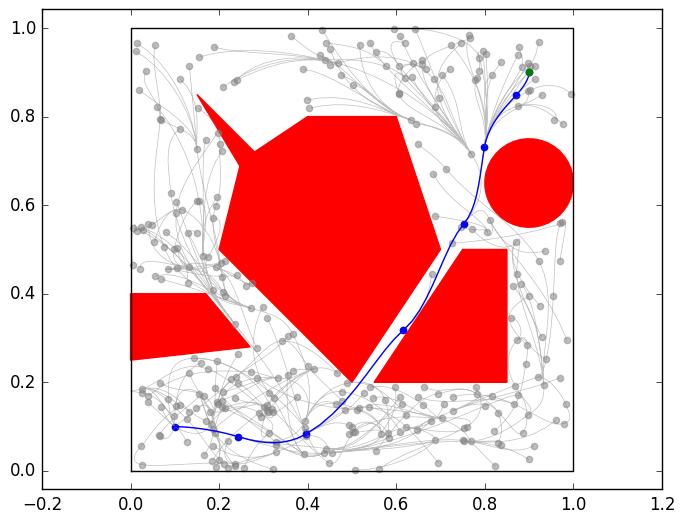

(:solved,5.7235789452110915)

In [5]:
fmtstar!(P, 1000, connections = :R, r = 1.)
plot(P, meta=true)

### Simple Car Planning

In [6]:
statespace = DubinsQuasiMetricSpace(.15)   # BoundedStateSpace, lo = [0,0,0], hi = [0,0,2pi], dist = arc length
init = SE2State(.1,.1,0.)
goal = PointGoal([.9,.9])
collisionchecker = PointRobot2D(ISRR_POLY_WITH_SPIKE())
P = MPProblem(statespace, init, goal, collisionchecker);

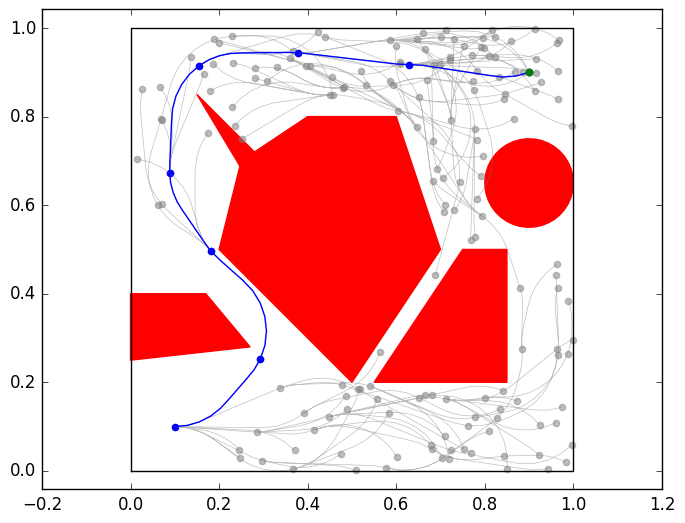

(:solved,1.7723017293799017)

In [7]:
fmtstar!(P, 1000, connections = :R, r = .3, ensure_goal_ct = 10)   # sampling 10 terminal angles at [.9,.9]
plot(P, meta=true)